## Importing Data

In [1]:
# First we will import the initial required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt"

data = pd.read_csv(url)

## Exploratory Data Analysis

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# We have to check the basic information of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# We will check the discription of data.
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Now we will create a new dataframe where data will be groupby on the basis of 'left'. Which will help us 
# to understand the distribution of data.
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Data visualisation

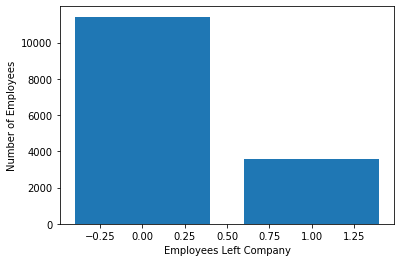

0    11428
1     3571
Name: left, dtype: int64

In [7]:
# We will plot the bargraph to visualize the data distribution.
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

data.left.value_counts()

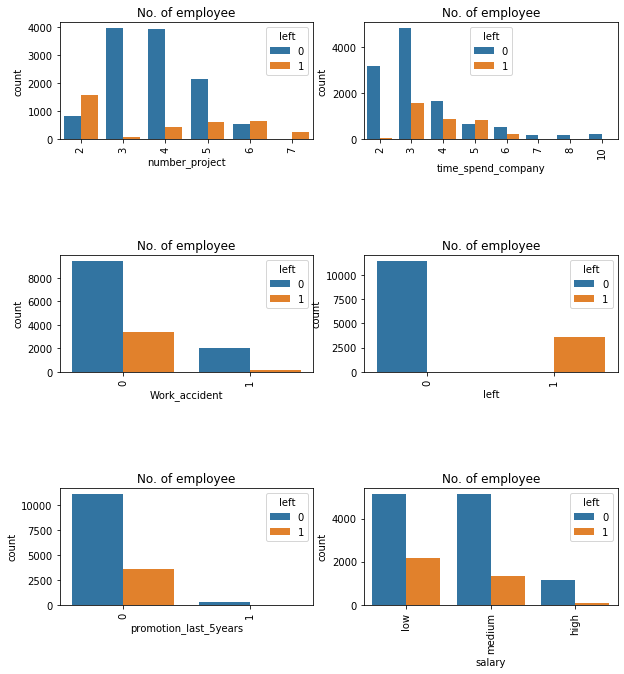

In [8]:
# Now we create a subplot on the basis of certain features to check the data distribution.
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [9]:
# In provided data, Salary is stored as "Low",'medium','high'. So we need to encode this feature as we require the data in neumarical form to fit in any model. We will use Label encoder to encode the feature.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])

In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [12]:
# Now we will store the features in X and dependent variable in y for training purpose. As per my business intuitios,
# following features will improve the prediction of model.   
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary']]
y=data['left']

print("**X dataset**\n\n",X.head())
print("\n**y dataset**\n\n",y.head())


**X dataset**

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  
0                   3              0                      0       1  
1                   6              0                      0       2  
2                   4              0                      0       2  
3                   5              0                      0       1  
4                   3              0                      0       1  

**y dataset**

 0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


## Fitting models and testing

In [13]:
# Now we will split the X and y in test and split.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [14]:
# Now we will import some modules, train them and we will see wich one is performing best.

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
knn= KNeighborsClassifier()

gb.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_predgb = gb.predict(X_train)
y_predrf = rf.predict(X_train)
y_predknn = knn.predict(X_train)

print("Accuracy GradientBoostingClassifier: ", metrics.accuracy_score(y_train, y_predgb))
print("Accuracy RandomForestClassifier: ", metrics.accuracy_score(y_train, y_predrf))
print("Accuracy KNeighborsClassifier: ", metrics.accuracy_score(y_train, y_predknn))
print("------------------------------------------------------")
print("Precision GradientBoostingClassifier: ", metrics.precision_score(y_train, y_predgb))
print("Precision RandomForestClassifier: ", metrics.precision_score(y_train, y_predrf))
print("Precision KNeighborsClassifier: ", metrics.precision_score(y_train, y_predknn))
print("------------------------------------------------------")
print("Recall GradientBoostingClassifier: ", metrics.recall_score(y_train, y_predgb))
print("Recall RandomForestClassifier: ", metrics.recall_score(y_train, y_predrf))
print("Recall KNeighborsClassifier: ", metrics.recall_score(y_train, y_predknn))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy GradientBoostingClassifier:  0.977498124843737
Accuracy RandomForestClassifier:  0.9980831735977999
Accuracy KNeighborsClassifier:  0.960663388615718
------------------------------------------------------
Precision GradientBoostingClassifier:  0.9716466739367503
Precision RandomForestClassifier:  1.0
Precision KNeighborsClassifier:  0.8901206390609716
------------------------------------------------------
Recall GradientBoostingClassifier:  0.9329842931937172
Recall RandomForestClassifier:  0.9919720767888307
Recall KNeighborsClassifier:  0.9528795811518325


In [15]:
# As per test results Random forest classifier is giving the results up to the mark so we will 
# run the tests on Test dataset.

Y_predrf = rf.predict(X_test)

print("Accuracy RandomForestClassifier: ", metrics.accuracy_score(y_test, Y_predrf))
print("Precision RandomForestClassifier: ", metrics.precision_score(y_test, Y_predrf))
print("Recall RandomForestClassifier: ", metrics.recall_score(y_test, Y_predrf))



Accuracy RandomForestClassifier:  0.9866666666666667
Precision RandomForestClassifier:  0.9854227405247813
Recall RandomForestClassifier:  0.9575070821529745


## Diployment

In [16]:
#We have to accept the values from user to predict the outcome.

print("***Hii welcome to employee exit predicton program***")
Emp_id = input("Please enter the employee id:")

satisfaction_level_D = float(input("Please enter the satisfaction level of employee(0 - 1.00):"))
last_evaluation_D = float(input("Please enter the last evaluation score of employee(0 - 1.00):"))
number_project_D = int(input("Please enter the number of project employee have worked on:"))
average_montly_hours_D = int(input("Please enter the average monthly hours work performed by employee:"))
time_spend_company_D = int(input("Please enter the time spend by employee in company(in years):"))
Work_accident_D = int(input("Is accident happen to employee(1 for yes and 0 for no):"))
promotion_last_5years_D = int(input("Promotion in last year(1 for yes and 0 for no):"))
salary_D = int(input("Salary level(1-low,2-mid,3-high):"))

Data_D = [[satisfaction_level_D, last_evaluation_D, number_project_D,
       average_montly_hours_D, time_spend_company_D, Work_accident_D,
       promotion_last_5years_D, salary_D]]

Y_pred_D = rf.predict(Data_D)
if int(Y_pred_D) == 0:
    Ans = "no"
else:
    Ans = "yes"
    
print("The probablity of employee ",Emp_id,"exiting the company is",Ans)

***Hii welcome to employee exit predicton program***
Please enter the employee id:E2009258
Please enter the satisfaction level of employee(0 - 1.00):0.6
Please enter the last evaluation score of employee(0 - 1.00):0.9
Please enter the number of project employee have worked on:4
Please enter the average monthly hours work performed by employee:134
Please enter the time spend by employee in company(in years):1
Is accident happen to employee(1 for yes and 0 for no):0
Promotion in last year(1 for yes and 0 for no):0
Salary level(1-low,2-mid,3-high):2
The probablity of employee  E2009258 exiting the company is no
